# Descriptions
- Prediksi yang dilakukan adalah klasifikasi untuk target churn (1-Yes atau 0-No) dan regresi untuk target tenure.
- Prediksi dengan klasifikasi menggunakan model machine learning
- Prediksi dengan regresi menggunakan model machine learning

# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# Initialize and load dataset
Terdapat tiga dataset, antara lain:
- EDA dataset, yaitu dataset yang telah bersih dari outlier, missing, duplikat, dan mismatch. Siap untuk digunakan untuk eksplorasi.
- Feature engineering dataset, yaitu dataset hasil dari feature engineering yang meliputi, feature transformation, feature extraction, dan feture selection. Dataset terbagi lagi atas 2, yaitu untuk model classification dan model regression.
- PCA dataset adalah hasil reduki fitur menggunakan metode PCA (Principal Component Analysis).

## EDA

In [2]:
EDA_train_df = pd.read_csv('../datasets/train/EDA_train.csv')
EDA_test_df = pd.read_csv('../datasets/test/EDA_test.csv')

### Classification - Split dataset to X_train and y_train / X_test and y_test

In [3]:
X_EDA_classification_train = EDA_train_df.iloc[:, 1:20]
y_EDA_classification_train = EDA_train_df.iloc[:, 20:21]
X_EDA_classification_test  = EDA_test_df.iloc[:, 1:20]
y_EDA_classification_test  = EDA_test_df.iloc[:, 20:21]

### Regression - Split dataset to X_train and y_train / X_test and y_test

In [4]:
X_EDA_regression_train = EDA_train_df.loc[:, ['gender', 'senior_citizen', 'partner', 'dependents',
                                              'phone_service', 'multiple_lines', 'internet_service',
                                              'online_security', 'online_backup', 'device_protection', 'tech_support',
                                              'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
                                              'payment_method', 'monthly_charges', 'total_charges', 'churn']]

y_EDA_regression_train = EDA_train_df.loc[:, 'tenure']

X_EDA_regression_test  = EDA_test_df.loc[:, ['gender', 'senior_citizen', 'partner', 'dependents',
                                             'phone_service', 'multiple_lines', 'internet_service',
                                             'online_security', 'online_backup', 'device_protection', 'tech_support',
                                             'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
                                             'payment_method', 'monthly_charges', 'total_charges', 'churn']]

y_EDA_regression_test  = EDA_test_df.loc[:, 'tenure']

## Feature Engineering

### Classification Model

In [5]:
feature_engineering_classification_train_df = pd.read_csv('../datasets/train/feature_engineering_classification_train.csv')
feature_engineering_classification_test_df = pd.read_csv('../datasets/test/feature_engineering_classification_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test 

In [6]:
X_feature_engineering_classification_train = feature_engineering_classification_train_df.iloc[:, 0:4]
y_feature_engineering_classification_train = feature_engineering_classification_train_df.iloc[:, 4:5]
X_feature_engineering_classification_test  = feature_engineering_classification_test_df.iloc[:, 0:4]
y_feature_engineering_classification_test  = feature_engineering_classification_test_df.iloc[:, 4:5]

### Regression Model

In [7]:
feature_engineering_regression_train_df = pd.read_csv('../datasets/train/feature_engineering_regression_train.csv')
feature_engineering_regression_test_df = pd.read_csv('../datasets/test/feature_engineering_regression_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test

In [8]:
X_feature_engineering_regression_train = feature_engineering_regression_train_df.iloc[:, 0:4]
y_feature_engineering_regression_train = feature_engineering_regression_train_df.iloc[:, 4:5]
X_feature_engineering_regression_test  = feature_engineering_regression_test_df.iloc[:, 0:4]
y_feature_engineering_regression_test  = feature_engineering_regression_test_df.iloc[:, 4:5]

## PCA

### Classification Model

In [9]:
PCA_classification_train_df = pd.read_csv('../datasets/train/PCA_classification_train.csv')
PCA_classification_test_df = pd.read_csv('../datasets/test/PCA_classification_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test

In [10]:
X_PCA_classification_train = PCA_classification_train_df.iloc[:, 0:1]
y_PCA_classification_train = PCA_classification_train_df.iloc[:, 19:20]
X_PCA_classification_test  = PCA_classification_test_df.iloc[:, 0:1]
y_PCA_classification_test  = PCA_classification_test_df.iloc[:, 19:20]

### Regression Model

In [11]:
PCA_regression_train_df = pd.read_csv('../datasets/train/PCA_regression_train.csv')
PCA_regression_test_df  = pd.read_csv('../datasets/test/PCA_regression_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test

In [12]:
X_PCA_regression_train = PCA_regression_train_df.iloc[:, 0:2]
y_PCA_regression_train = PCA_regression_train_df.iloc[:, 19:20]
X_PCA_regression_test  = PCA_regression_test_df.iloc[:, 0:2]
y_PCA_regression_test  = PCA_regression_test_df.iloc[:, 19:20]

# Build model

## Decision Tree

### EDA Dataset

#### Classification

In [13]:
accuracy_scores = []

for i in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=42)
    
    clf.fit(X_EDA_classification_train, y_EDA_classification_train)
    accuracy_score_n = accuracy_score(y_EDA_classification_test, clf.predict(X_EDA_classification_test))
    accuracy_scores.append(accuracy_score_n)

In [14]:
for i in range(1, 20):
    print(f'max_depth {i} : {accuracy_scores[i]:.6f}%')

max_depth 1 : 0.766501%
max_depth 2 : 0.789212%
max_depth 3 : 0.791341%
max_depth 4 : 0.791341%
max_depth 5 : 0.794180%
max_depth 6 : 0.786373%
max_depth 7 : 0.787083%
max_depth 8 : 0.775727%
max_depth 9 : 0.762243%
max_depth 10 : 0.747339%
max_depth 11 : 0.740951%
max_depth 12 : 0.741661%
max_depth 13 : 0.717530%
max_depth 14 : 0.722498%
max_depth 15 : 0.711852%
max_depth 16 : 0.713982%
max_depth 17 : 0.721079%
max_depth 18 : 0.716820%
max_depth 19 : 0.715401%


###### Cross Validation Score

In [15]:
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
cross_val_score(clf, X_EDA_classification_test, y_EDA_classification_test, cv=10)

array([0.79432624, 0.78723404, 0.80851064, 0.82269504, 0.78723404,
       0.75177305, 0.81560284, 0.76595745, 0.80141844, 0.78571429])

##### Confusion Matrix

In [16]:
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
clf.fit(X_EDA_classification_train, y_EDA_classification_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [17]:
y_train_pred = cross_val_predict(clf, X_EDA_classification_train, np.ravel(y_EDA_classification_train), cv=3)

print(f'True positive  : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[1, 1]}')
print(f'True negative  : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[0, 0]}')
print(f'False positive : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[0, 1]}')
print(f'False negative : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[1, 0]}')

True positive  : 547
True negative  : 3873
False positive : 265
False negative : 949


###### Precision

In [18]:
print(f'Precision: {round(precision_score(np.ravel(y_EDA_classification_train), y_train_pred) * 100, 2)}%')

Precision: 67.36%


##### Recall

In [19]:
print(f'Recall: {round(recall_score(np.ravel(y_EDA_classification_train), y_train_pred) * 100, 2)}%')

Recall: 36.56%


##### F1-Score

In [20]:
print(f'F-1 Score: {round(f1_score(np.ravel(y_EDA_classification_train), y_train_pred) * 100, 2)}%')

F-1 Score: 47.4%


##### Classification Report

In [21]:
print(classification_report(y_EDA_classification_test, clf.predict(X_EDA_classification_test)))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.68      0.38      0.49       373

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409



##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [22]:
y_scores = cross_val_predict(clf, X_EDA_classification_train, np.ravel(y_EDA_classification_train), cv=3,)
precisions, recalls, thresholds = precision_recall_curve(y_EDA_classification_train, y_scores)

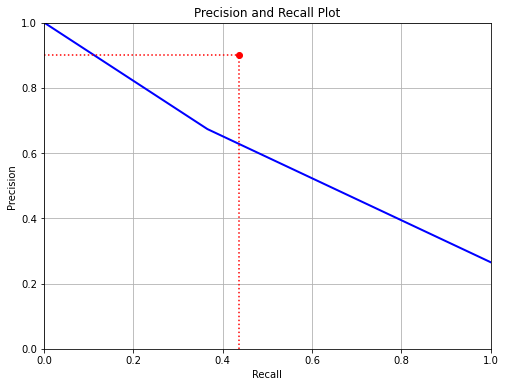

In [23]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.title('Precision and Recall Plot')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

##### ROC and AUC Curve

In [24]:
fpr, tpr, thresholds = roc_curve(y_EDA_classification_train, y_scores)

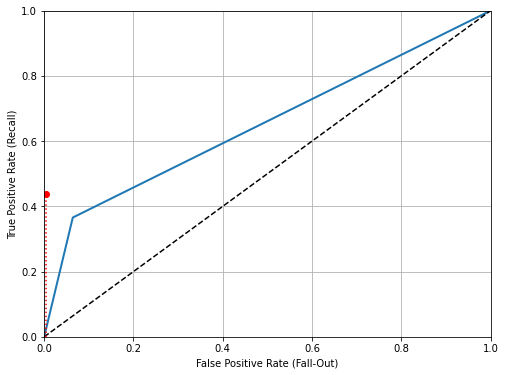

In [25]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [26]:
roc_auc_score(y_EDA_classification_train, y_scores)

0.650800555953301

#### Regression

In [27]:
regressor = DecisionTreeRegressor(max_depth=7, random_state=42)
cross_val_score(regressor, X_EDA_regression_train, y_EDA_regression_train, cv=3)

array([0.98909247, 0.98682834, 0.98563828])

##### R Squared Score

In [28]:
regressor.fit(X_EDA_regression_train, y_EDA_regression_train)
r2_score(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))

0.9892809842224658

##### Explained Variance Score

In [29]:
explained_variance_score(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))

0.9893075458955269

##### Mean Absolute Error

In [30]:
mean_absolute_error(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))

1.7137856733966161

##### Mean Squared Error

In [31]:
mean_squared_error(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))

6.748628052300676

###### Predict with some feature

In [32]:
regressor.predict(X_EDA_regression_test.iloc[50:60, 0:19])

array([19.87179487, 23.42857143, 71.66666667, 70.18905473, 62.16666667,
       67.19642857, 66.70588235,  9.10526316,  2.86486486, 21.59854015])

In [33]:
y_EDA_regression_test[50:60]

50    19
51    23
52    72
53    72
54    59
55    70
56    70
57     9
58     3
59    17
Name: tenure, dtype: int64

### Feature Engineering Dataset

#### Classification

In [34]:
accuracy_scores = []

for i in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)

    clf.fit(X_feature_engineering_classification_train, y_feature_engineering_classification_train)
    accuracy_score_n = accuracy_score(y_feature_engineering_classification_test, clf.predict(X_feature_engineering_classification_test))
    accuracy_scores.append(accuracy_score_n)

In [35]:
for i in range(1, 20):
    print(f'max_depth {i} : {accuracy_scores[i]:.6f}%')

max_depth 1 : 0.625976%
max_depth 2 : 0.628815%
max_depth 3 : 0.628815%
max_depth 4 : 0.628815%
max_depth 5 : 0.628815%
max_depth 6 : 0.628815%
max_depth 7 : 0.628815%
max_depth 8 : 0.628815%
max_depth 9 : 0.628815%
max_depth 10 : 0.628815%
max_depth 11 : 0.628815%
max_depth 12 : 0.628815%
max_depth 13 : 0.628815%
max_depth 14 : 0.628815%
max_depth 15 : 0.628815%
max_depth 16 : 0.628815%
max_depth 17 : 0.628815%
max_depth 18 : 0.628815%
max_depth 19 : 0.628815%


##### Cross Validation Score

In [36]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
cross_val_score(clf, X_feature_engineering_classification_train, y_feature_engineering_classification_train, cv=10)

array([0.66489362, 0.64007092, 0.64361702, 0.61170213, 0.62344583,
       0.65541741, 0.660746  , 0.61101243, 0.63943162, 0.6625222 ])

##### Confusion Matrix

In [37]:
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=42)
clf.fit(X_feature_engineering_classification_train, y_feature_engineering_classification_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [38]:
y_train_pred = cross_val_predict(clf, X_feature_engineering_classification_train, np.ravel(y_feature_engineering_classification_train), cv=3)

print(f'True positive  : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[1, 1]}')
print(f'True negative  : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[0, 0]}')
print(f'False positive : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[0, 1]}')
print(f'False negative : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[1, 0]}')

True positive  : 939
True negative  : 2674
False positive : 275
False negative : 1746


##### Precision

In [39]:
print(f'Precision: {round(precision_score(np.ravel(y_feature_engineering_classification_train), y_train_pred) * 100, 2)}%')

Precision: 77.35%


##### Recall

In [40]:
print(f'Recall: {round(recall_score(np.ravel(y_feature_engineering_classification_train), y_train_pred) * 100, 2)}%')

Recall: 34.97%


##### F1-Score

In [41]:
print(f'F-1 Score: {round(f1_score(np.ravel(y_feature_engineering_classification_train), y_train_pred) * 100, 2)}%')

F-1 Score: 48.17%


##### Classification Report

In [42]:
print(classification_report(y_feature_engineering_classification_test, clf.predict(X_feature_engineering_classification_test)))

              precision    recall  f1-score   support

           0       0.58      0.90      0.71       704
           1       0.79      0.35      0.48       705

    accuracy                           0.63      1409
   macro avg       0.68      0.63      0.59      1409
weighted avg       0.68      0.63      0.59      1409



##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [43]:
y_scores = cross_val_predict(clf, X_feature_engineering_classification_train, np.ravel(y_feature_engineering_classification_train), cv=3,)
precisions, recalls, thresholds = precision_recall_curve(y_feature_engineering_classification_train, y_scores)

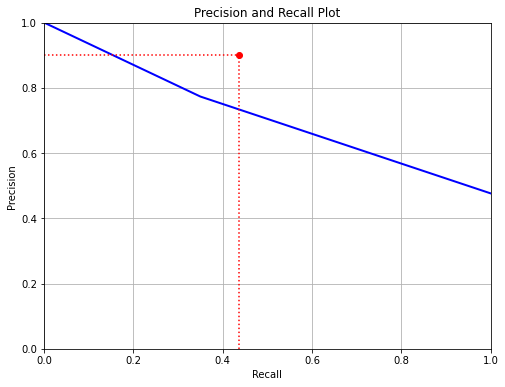

In [44]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.title('Precision and Recall Plot')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

##### ROC and AUC Curve

In [45]:
fpr, tpr, thresholds = roc_curve(y_feature_engineering_classification_train, y_scores)

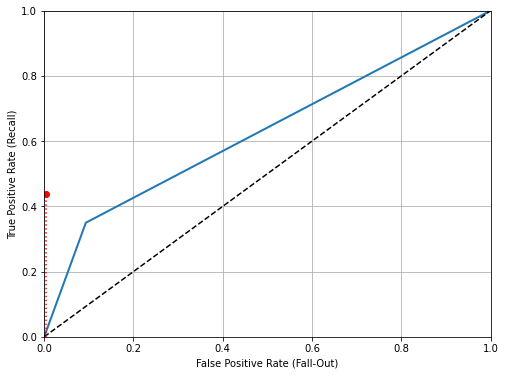

In [46]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [47]:
roc_auc_score(y_feature_engineering_classification_train, y_scores)

0.6282343602887827

#### Regression

In [48]:
regressor = DecisionTreeRegressor(max_depth=7, random_state=42)
cross_val_score(regressor, X_feature_engineering_regression_train, y_feature_engineering_regression_train, cv=10)

array([0.98906158, 0.98856247, 0.99130928, 0.98618381, 0.98775349,
       0.98774949, 0.98872934, 0.986341  , 0.98225247, 0.98916496])

##### R Squared Error

In [49]:
regressor.fit(X_feature_engineering_regression_train, y_feature_engineering_regression_train)
r2_score(y_feature_engineering_regression_test, regressor.predict(X_feature_engineering_regression_test))

0.9888643118927358

##### Mean Absolute Error

In [50]:
mean_absolute_error(y_feature_engineering_regression_test, regressor.predict(X_feature_engineering_regression_test))

1.738048489331267

##### Mean Squared Error

In [51]:
mean_squared_error(y_feature_engineering_regression_test, regressor.predict(X_feature_engineering_regression_test))

7.01096245234199

##### Predict with some feature

In [52]:
regressor.predict(X_feature_engineering_regression_test.iloc[50:60, 0:19])

array([19.87179487, 23.42857143, 71.66666667, 70.18905473, 62.16666667,
       67.19642857, 66.70588235,  9.10526316,  2.86486486, 21.59854015])

In [53]:
y_feature_engineering_regression_test[50:60]

,tenure
50,19
51,23
52,72
53,72
54,59
55,70
56,70
57,9
58,3
59,17


### PCA Dataset

#### Classification

In [54]:
accuracy_scores = []

for i in range(1, 20):
    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)

    clf.fit(X_PCA_classification_train, y_PCA_classification_train)
    accuracy_score_n = accuracy_score(y_PCA_classification_test, clf.predict(X_PCA_classification_test))
    
    accuracy_scores.append(accuracy_score_n)

In [55]:
for i in range(1, 19):
    print(f'max_depth {i} : {accuracy_scores[i]:.6f}%')

max_depth 1 : 0.742370%
max_depth 2 : 0.757275%
max_depth 3 : 0.756565%
max_depth 4 : 0.753016%
max_depth 5 : 0.753016%
max_depth 6 : 0.748048%
max_depth 7 : 0.749468%
max_depth 8 : 0.748048%
max_depth 9 : 0.746629%
max_depth 10 : 0.738822%
max_depth 11 : 0.740951%
max_depth 12 : 0.741661%
max_depth 13 : 0.733144%
max_depth 14 : 0.740241%
max_depth 15 : 0.740241%
max_depth 16 : 0.738112%
max_depth 17 : 0.736693%
max_depth 18 : 0.738112%


##### Cross Validation Score

In [56]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_PCA_classification_train, y_PCA_classification_train)
cross_val_score(clf, X_PCA_classification_test, y_PCA_classification_test, cv=3)

array([0.75106383, 0.74680851, 0.73560768])

In [57]:
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=42)
clf.fit(X_PCA_classification_train, y_PCA_classification_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [58]:
# y_train_pred = cross_val_predict(clf, X_PCA_classification_train, np.ravel(y_PCA_classification_train), cv=3)

# print(f'True positive  : {confusion_matrix(np.ravel(X_PCA_classification_train), y_train_pred)[1, 1]}')
# print(f'True negative  : {confusion_matrix(np.ravel(X_PCA_classification_train), y_train_pred)[0, 0]}')
# print(f'False positive : {confusion_matrix(np.ravel(X_PCA_classification_train), y_train_pred)[0, 1]}')
# print(f'False negative : {confusion_matrix(np.ravel(X_PCA_classification_train), y_train_pred)[1, 0]}')

##### Precision

In [59]:
print(f'Precision: {round(precision_score(np.ravel(y_PCA_classification_train), y_train_pred) * 100, 2)}%')

Precision: 7.66%


##### Recall

In [60]:
print(f'Recall: {round(recall_score(np.ravel(y_PCA_classification_train), y_train_pred) * 100, 2)}%')

Recall: 6.22%


##### F1-Score

In [61]:
print(f'F-1 Score: {round(f1_score(np.ravel(y_PCA_classification_train), y_train_pred) * 100, 2)}%')

F-1 Score: 6.86%


##### Classification Report

In [62]:
print(classification_report(y_PCA_classification_test, clf.predict(X_PCA_classification_test)))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1036
           1       0.53      0.25      0.34       373

    accuracy                           0.74      1409
   macro avg       0.65      0.58      0.59      1409
weighted avg       0.71      0.74      0.71      1409



##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [63]:
y_scores = cross_val_predict(clf, X_PCA_classification_train, np.ravel(y_PCA_classification_train), cv=3,)
precisions, recalls, thresholds = precision_recall_curve(y_PCA_classification_train, y_scores)

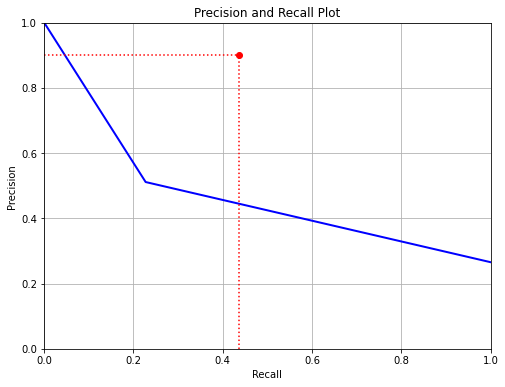

In [64]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.title('Precision and Recall Plot')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [65]:
fpr, tpr, thresholds = roc_curve(y_PCA_classification_train, y_scores)

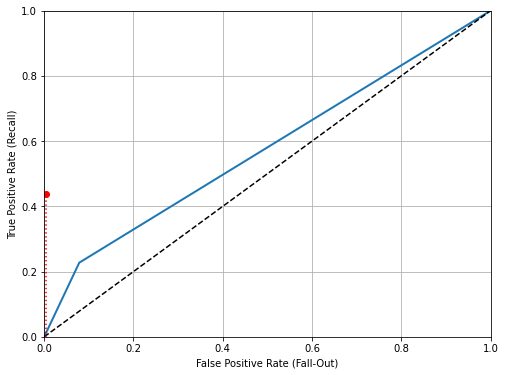

In [66]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [67]:
roc_auc_score(y_PCA_classification_train, y_scores)

0.5743661848060109

#### Regression

In [68]:
regressor = DecisionTreeRegressor(max_depth=7, random_state=42)
cross_val_score(regressor, X_PCA_regression_test, y_PCA_regression_test, cv=10)

array([0.98914095, 0.99273452, 0.98711039, 0.98893593, 0.98407769,
       0.99033449, 0.99233443, 0.98715214, 0.99172239, 0.98819678])

##### R Squared Error

In [69]:
regressor.fit(X_PCA_regression_train, y_PCA_regression_train)
r2_score(y_PCA_regression_test, regressor.predict(X_PCA_regression_test))

0.9921822298627253

##### Mean Absolute Error

In [70]:
mean_absolute_error(y_PCA_regression_test, regressor.predict(X_PCA_regression_test))

1.4569875841989506

##### Mean Squared Error

In [71]:
mean_squared_error(y_PCA_regression_test, regressor.predict(X_PCA_regression_test))

4.922021195773162

##### Predict with some feature

In [72]:
regressor.predict(X_PCA_regression_test.iloc[50:60, 0:19])

array([18.65      , 26.16981132, 71.85227273, 70.40425532, 58.25      ,
       66.56756757, 66.19266055, 11.58426966,  3.30555556, 17.85714286])

In [73]:
y_PCA_regression_test[50:60]

,tenure
50,19
51,23
52,72
53,72
54,59
55,70
56,70
57,9
58,3
59,17
